In [1]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
import sys
sys.path.append("…/…/")

In [0]:
from fastai.tabular import *

In [0]:
import pandas as pd

In [0]:
df_1 = pd.read_csv('data/train.csv')
df_2 = pd.read_csv('data/validation_set.csv')

In [0]:
df = pd.concat([df_1, df_2], axis = 0)

In [0]:
df_test = pd.read_csv('data/test.csv')

In [0]:
df.to_csv('data/df.csv', index = False)

In [0]:
path = 'data'

In [0]:
procs = [Categorify, Normalize]

In [0]:
valid_idx = range(len(df)- len(df_2), len(df))

In [0]:
dep_var = 'TARGET'

In [13]:
df.columns

Index(['RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME',
       'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE', 'TARGET'],
      dtype='object')

In [14]:
df['TARGET'].nunique()

2

In [0]:
cat_names = ['ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY'
            , 'ROLE_CODE']

In [0]:

test = (TabularList.from_df(df_test, path=path, cat_names=cat_names, procs=procs))

In [0]:
data = (TabularList.from_df(df, procs=procs, cat_names = cat_names)
                           .split_by_idx(list(valid_idx))
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

In [18]:
data.show_batch()

ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,target
117902,117903,119181,117905,118036,290919,117908,1
120864,120865,118437,120313,230838,118424,120315,1
117910,117911,117878,118568,142278,19721,118570,1
117961,117962,118501,118502,130777,118504,118505,1
117961,118300,120722,118784,117906,290919,118786,1


In [0]:
learn = tabular_learner(data, layers=[1000, 500, 500], metrics=[accuracy], emb_drop=0.4)

In [20]:
learn.lr_find(start_lr = 1e-05,end_lr = 1e+05, num_it = 1000)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


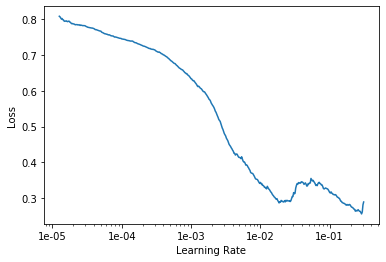

In [21]:
learn.recorder.plot()

In [22]:
learn.fit_one_cycle(100, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.264792,0.227456,0.931561,00:03
1,0.206546,0.192528,0.941369,00:03
2,0.197450,0.191178,0.943984,00:03
3,0.175829,0.191825,0.944856,00:03
4,0.160979,0.182274,0.943112,00:03
5,0.170323,0.189917,0.941369,00:03
6,0.167324,0.196337,0.941805,00:03
7,0.178093,0.203353,0.940715,00:03
8,0.167671,0.195531,0.941151,00:03
9,0.167656,0.259198,0.928509,00:03


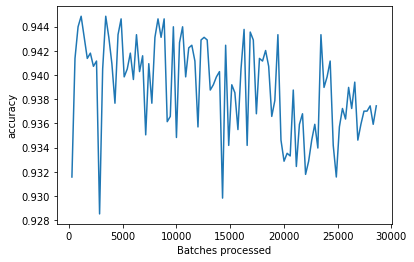

In [23]:
learn.recorder.plot_metrics()

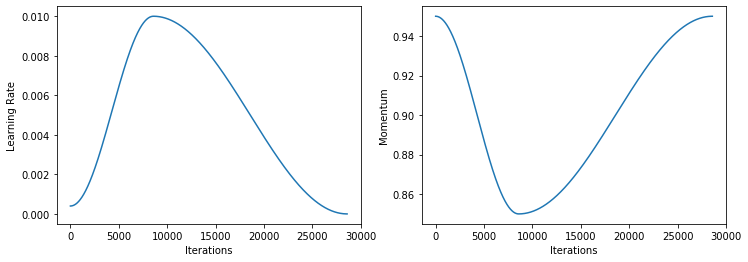

In [24]:
learn.recorder.plot_lr(show_moms=True)

In [25]:
predictions_val = learn.get_preds(ds_type=DatasetType.Valid)

In [26]:
predictions_test = learn.get_preds(ds_type=DatasetType.Test)

In [0]:
predictions_val = [i[1].item() for i in predictions_val[0]]
predictions_test = [i[1].item() for i in predictions_test[0]]

In [0]:
sub1 = pd.DataFrame(np.column_stack([df_2['TARGET'], predictions_val]), columns = ['Actual', 'Predicted'])
sub1.to_csv('data/classification_fastaitabular_insample.csv', index = False)

In [0]:
sub2 = pd.DataFrame(np.column_stack([predictions_test]), columns = ['Predicted'])
sub2.to_csv('data/classification_fastaitabular_outofsample.csv', index = False)